In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lifespan of VTubers

In [2]:
survival = pd.read_csv("data/obs_intervals.csv")

In [7]:
survival['income'].mean()

2.667547133288081

In [29]:
survival['max_time'] = survival.groupby('VTuber')['stop'].transform('max')
survival['final_status'] = survival.groupby('VTuber')['status'].transform('max')



In [34]:
final = survival.drop_duplicates("VTuber")

In [88]:
final.groupby("affiliation")['max_time'].median()

affiliation
Independent          28.0
Large affiliation    44.0
Other affiliation    21.0
Name: max_time, dtype: float64

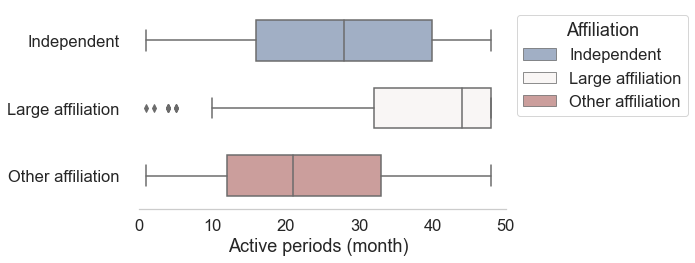

In [86]:
final

plt.figure(figsize=(10, 4))
ax = sns.boxplot(
    final, x="max_time", y="affiliation", hue="affiliation", width=.6, palette="vlag", dodge=False
)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="Active periods (month)",ylabel='')
sns.despine(trim=True, left=True)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Affiliation")
ax.xaxis.grid(False)
ax.yaxis.grid(False)
sns.set_context("notebook", font_scale=1.5)
plt.tight_layout()
plt.savefig("lifespan_histogram_all.pdf",dpi=300)

In [93]:
import pingouin as pg
pg.pairwise_tests(dv='max_time', between='affiliation', subject='VTuber',
                   data=final, parametric=False,padjust='fdr_bh')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,affiliation,Independent,Large affiliation,False,False,31436.0,two-sided,1.386036e-15,2.079054e-15,fdr_bh,-0.690869
1,affiliation,Independent,Other affiliation,False,False,242736.5,two-sided,2.032897e-07,2.032897e-07,fdr_bh,0.286964
2,affiliation,Large affiliation,Other affiliation,False,False,111493.0,two-sided,4.356456e-29,1.306937e-28,fdr_bh,1.026480


### Aggregated data

In [135]:
features = pd.read_csv("data/vtuber_stats_1129.tsv",sep='\t')

In [98]:
features

,vtuber_name,num_unique_users,num_paid_users,num_loyal_users,num_members,paid_user_ratio,loyal_user_ratio,member_ratio,total_income,num_paid_chats,...,std_income_month,std_session_month,gini_index_by_income_month,gini_index_by_session_month,Affiliation,Gender,mean_loyal_user_percentage_over_months,median_loyal_user_percentage_over_months,sd_loyal_user_percentage_over_months,livechat_folder
0,Aura_Lily,1957,7,102,0,0.003577,0.052121,0.000000,21.297874,8.0,...,5.486560,2.989066,0.398703,0.927844,4 REALITY,Female,0.136681,0.073684,0.165119,livechat_0
1,Jaret_Fajrianto,20033,0,81,131,0.000000,0.004043,0.006539,0.000000,0.0,...,NaN,0.000000,NaN,0.000000,GHOSTY's COMIC,Male,0.016918,0.008081,0.021186,livechat_0
2,Iida_Pochi,48815,2198,977,1527,0.045027,0.020014,0.031281,51926.846309,6287.0,...,1687.238965,1669.623638,0.639905,0.657052,Independent,Female,0.058651,0.019518,0.081255,livechat_0
3,Figaro,8340,735,560,1633,0.088129,0.067146,0.195803,42172.464233,4915.0,...,1034.714830,1034.714830,0.351329,0.351329,SODA_KIT,Female,0.155016,0.092387,0.131667,livechat_0
4,Takamiya_Rion,148036,5926,597,3340,0.040031,0.004033,0.022562,337211.803184,40971.0,...,3982.857470,4019.639376,0.365886,0.376634,NIJISANJI,Female,0.009081,0.006605,0.008149,livechat_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,Hayate_Takanashi,5470,177,147,136,0.032358,0.026874,0.024863,5195.849970,781.0,...,224.948543,220.420613,0.575306,0.615121,Independent,Female,0.043607,0.029874,0.037800,livechat_5
1709,Revna_Ulfhild,21,0,5,0,0.000000,0.238095,0.000000,0.000000,0.0,...,NaN,0.000000,NaN,0.000000,Pearl Orient Production,Female,0.408883,0.282051,0.353810,livechat_5
1710,Nekonogi_Bell,6405,480,262,389,0.074941,0.040906,0.060734,35218.606034,7003.0,...,625.691909,627.720747,0.457834,0.478294,ViViD,Female,0.158050,0.110825,0.122675,livechat_5
1711,Itsuka_Iyu,718,42,49,29,0.058496,0.068245,0.040390,362.093840,108.0,...,20.249112,19.841110,0.474727,0.634593,Independent,Female,0.153489,0.108974,0.154644,livechat_5


In [136]:
df_melted = pd.melt(features, id_vars=['vtuber_name',"Affiliation"], 
                    value_vars=['paid_user_ratio', 'loyal_user_ratio', 'member_ratio'], 
                    var_name='ratio_type', value_name='ratio_value')

# Show the melted DataFrame
print(df_melted)

           vtuber_name              Affiliation       ratio_type  ratio_value
0            Aura_Lily                4 REALITY  paid_user_ratio     0.003577
1      Jaret_Fajrianto           GHOSTY's COMIC  paid_user_ratio     0.000000
2           Iida_Pochi              Independent  paid_user_ratio     0.045027
3               Figaro                 SODA_KIT  paid_user_ratio     0.088129
4        Takamiya_Rion                NIJISANJI  paid_user_ratio     0.040031
...                ...                      ...              ...          ...
5134  Hayate_Takanashi              Independent     member_ratio     0.024863
5135     Revna_Ulfhild  Pearl Orient Production     member_ratio     0.000000
5136     Nekonogi_Bell                    ViViD     member_ratio     0.060734
5137        Itsuka_Iyu              Independent     member_ratio     0.040390
5138              LITA                      NaN     member_ratio     0.000000

[5139 rows x 4 columns]


In [139]:
df_melted["Affiliation"].unique()
def categorize(x):
    try:
        x = x.lower()
        if 'holo' in x or 'nijisan' in x:
            return "large agency"
        elif "independent" in x:
            return "independent"
        else:
            return "other agency"
    except:
        return "independent"

df_melted['affiliation_type'] = df_melted['Affiliation'].apply(lambda x: categorize(x))


In [145]:
df_melted["ratio_type"].value_counts()

ratio_type
paid_user_ratio     1713
loyal_user_ratio    1713
member_ratio        1713
Name: count, dtype: int64

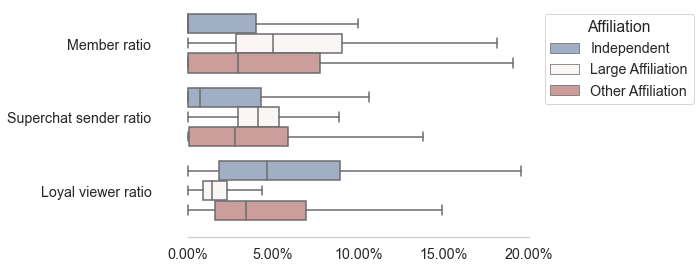

In [152]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 4))
# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="ratio_value", y="ratio_type",
            hue="affiliation_type", palette="vlag",showfliers=False,order=["member_ratio","paid_user_ratio","loyal_user_ratio"],hue_order = ['independent', 'large agency','other agency'],
            data=df_melted)
sns.despine(offset=10, trim=True)
ax.xaxis.grid(True)
ax.set(xlabel="",ylabel='')
sns.despine(trim=True, left=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[0], handles[1], handles[2]],loc='upper left', bbox_to_anchor=(1, 1), title="Affiliation",labels=['Independent', 'Large Affiliation', "Other Affiliation"])
ax.xaxis.grid(False)
ax.yaxis.grid(False)
sns.set_context("notebook", font_scale=1.3)
ax.set_xticks([0, 0.05, 0.1,.15,0.2])
def percent(x, pos):
    return f'{x*100:.2f}%'
# Apply the custom formatter to the y-axis
ax.xaxis.set_major_formatter(FuncFormatter(percent))
ax.set_yticklabels(['Member ratio', 'Superchat sender ratio', "Loyal viewer ratio"])  # Replace with your new labels

plt.tight_layout()
plt.savefig("ratio_by_affiliation.pdf",dpi=300)

In [137]:
import pingouin as pg

In [142]:
pg.kruskal(data=df_melted[df_melted['affiliation_type']=='independent'], dv='ratio_value', between='ratio_type')

,Source,ddof1,H,p-unc
Kruskal,ratio_type,2,268.540447,4.866121e-59


In [149]:
pg.kruskal(data=df_melted[df_melted['ratio_type']=='paid_user_ratio'], dv='ratio_value', between='affiliation_type')

,Source,ddof1,H,p-unc
Kruskal,affiliation_type,2,119.976747,8.858912e-27


In [ ]:
df_melted = pd.melt(features, id_vars=['vtuber_name',"Affiliation"], 
                    value_vars=['paid_user_ratio', 'loyal_user_ratio', 'member_ratio'], 
                    var_name='ratio_type', value_name='ratio_value')

# Show the melted DataFrame
print(df_melted)

In [29]:
def categorize(x):
    try:
        x = x.lower()
        if 'holo' in x or 'nijisan' in x:
            return "large agency"
        elif "independent" in x:
            return "independent"
        else:
            return "other agency"
    except:
        return "independent"

features['affiliation_type'] = features['Affiliation'].apply(lambda x: categorize(x))


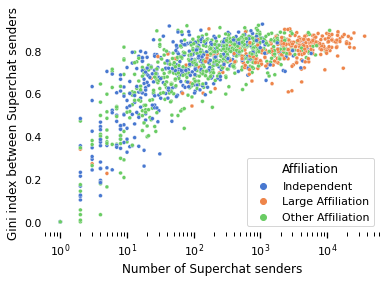

In [132]:
ax = sns.scatterplot(x="num_paid_users", y="gini_index_by_user", hue='affiliation_type',palette="muted",alpha=1,s=15,hue_order = ['independent', 'large agency','other agency'],
           data=features)

ax.xaxis.grid(False)
ax.yaxis.grid(False)
sns.despine(trim=True, left=True, bottom=True)
ax.tick_params(axis='y', which='both', length=0)  # This removes the ticks on the y-axis
ax.set_xticks([0, 10, 100,1000,10000,100000], minor=True)
plt.xscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[0], handles[1], handles[2]], title="Affiliation",labels=['Independent', 'Large Affiliation', "Other Affiliation"])
ax.set(xlabel="Number of Superchat senders",ylabel='Gini index between Superchat senders')
plt.savefig("gini_index_and_num_paid_users_r&r.pdf",dpi=300)

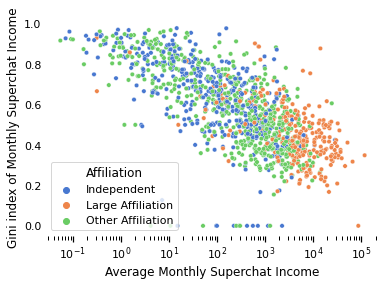

In [133]:
ax = sns.scatterplot(x="avg_income_per_session_month", y="gini_index_by_session_month", hue='affiliation_type',palette="muted",alpha=1,s=20,hue_order = ['independent', 'large agency','other agency'],
           data=features)

ax.xaxis.grid(False)
ax.yaxis.grid(False)
sns.despine(trim=True, left=True, bottom=True)
ax.tick_params(axis='y', which='both', length=0)  # This removes the ticks on the y-axis
plt.xscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[0], handles[1], handles[2]], title="Affiliation",labels=['Independent', 'Large Affiliation', "Other Affiliation"])
ax.set(xlabel="Average Monthly Superchat Income",ylabel='Gini index of Monthly Superchat Income')
sns.set_context("notebook", font_scale=1)
plt.savefig("avg_monthly_income_jointplot_r&r_v2.pdf",dpi=300)

In [60]:
data = pd.read_csv("data/affiliation_currencies.csv")

In [61]:
def categorize(x):

    x = x.lower()
    if 'holo' in x:
        return "Hololive"
    elif 'nijisan' in x:
        return "Nijisanji"
    elif "independant" in x:
        return "Independent"
    else:
        return "Other agencies"


data['affiliation_type'] = data['Affiliation'].apply(lambda x: categorize(x))


In [62]:
data['currency'] = data['currency'].replace('NT$', 'NT')


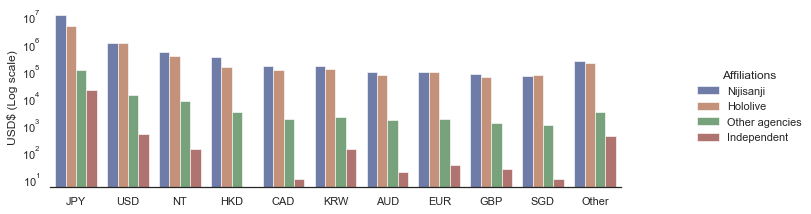

In [84]:
sns.set_theme(style="white")
# Make the PairGrid
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data, kind="bar",
    x="currency", y="usd_value", hue="affiliation_type", palette="dark", alpha=.6, height=6,errorbar=None,
    order=['JPY', 'USD', 'NT', 'HKD', 'CAD',  'KRW', 'AUD',  'EUR', 'GBP',  'SGD', 'Other'],
    hue_order=["Nijisanji", "Hololive", "Other agencies", "Independent"])
plt.yscale('log')
g.despine(left=True)
g.set_axis_labels("", "USD$ (Log scale)")
g.fig.set_size_inches(12, 3) 
g.legend.set_title("Affiliations")
plt.savefig("currency_by_agency.pdf",dpi=300)

In [ ]:
data.groupby(["affiliation_type","currency"]).sum()